# Earthquake as a triggering factor of an infinite slope mechanism

© 2024 Daniel F. Ruiz, Exneyder A. Montoya-Araque y Universidad EAFIT.

This notebook can be interactively run in [Google - Colab](https://colab.research.google.com/github/AppliedMechanics-EAFIT/EAFIT_slope_stability/blob/main/notebooks/infinite_slope_earthquake.ipynb).


This notebook runs the model ``pyNermarkDisp`` developed by [Montoya-Araque et al., (2024)](https://doi.org/10.1016/j.envsoft.2024.105942) based on the classical sliding rigid block method by [Newmark (1965)](https://doi.org/10.1680/geot.1965.15.2.139).

## Required modules and global setup for plots

In [1]:
import subprocess
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab. Installing the required modules...')
    subprocess.run('pip install ipympl', shell=True);
    subprocess.run('pip install pynewmarkdisp', shell=True);
    from google.colab import output, files
    output.enable_custom_widget_manager()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pynewmarkdisp.newmark import direct_newmark, plot_newmark_integration
from pynewmarkdisp.infslope import factor_of_safety, get_ky
from pynewmarkdisp.spatial import *
from ipywidgets import widgets as wgt

%matplotlib widget

plt.style.use("default")
mpl.rcParams.update(
    {
        'interactive': False,
        "text.usetex": False,  # Use mathtext, not LaTeX
        "font.family": "cmr10",  # Use the Computer modern font
        "mathtext.fontset": "cm",
        "axes.formatter.use_mathtext": True,
        "axes.unicode_minus": False,
    }
)

## Basic example

### Loading earthquake record and spatial data

In [2]:
url = "https://raw.githubusercontent.com/eamontoyaa/data4testing/main/pynewmarkdisp/"

# Loading earthquake data
earthquake_record = pd.read_csv(f"{url}earthquake_data_simple.csv", sep=";")
earthquake_record = pd.read_csv(f"{url}earthquake_data_simple.csv", sep=";")
g = 1.0  # It means, accel units are given in fractions of gravity
accel = np.array(earthquake_record["Acceleration"])
time = np.array(earthquake_record["Time"])

zones = np.array([[1]])  # [] ID of the zone to match with `parameters`
dem = np.array([[1]])  # [msnm] Digital elevation model for one cell model
slope = np.array([[40]])  # [°]
depth = np.array([[1]])  # [m]
depth_w = np.array([[1]])  # [m]

### Non-spatial inputs

In [3]:
# Geotechnical parameters for each geological zone
parameters = {1: (30, 5, 20)}  # Zone ID: (𝜙' [°], 𝑐' [kPa], 𝛾 [kN/m³])

# Associating geotechnical parameters to each geological zone spatially and plotting
phi, c, gamma = map_zones(parameters, zones)

### Calculating $\mathrm{FS}_\mathrm{static}$

In [4]:
fs = factor_of_safety(depth, depth_w, slope, phi, c, gamma, ks=0)
print(f"Static factor of safety: {fs:.2f}")

Static factor of safety: 1.20


### Calculating $k_\mathrm{y}$

In [5]:
ky = get_ky(depth, depth_w, slope, phi, c, gamma)
print(f"Critical seismic coefficient, ky: {ky:.2f}")

Critical seismic coefficient, ky: 0.11


### Calculating $\mathrm{FS}_\mathrm{pseudostatic}$ when $k_\mathrm{s}$ is 40% of $k_\mathrm{y}$

In [6]:
ks = 0.4 * ky
fs_ks = factor_of_safety(depth, depth_w, slope, phi, c, gamma, ks=ks)
print(f"Pseudostatic factor of safety: {fs_ks:.2f}")

decrease_fs = (fs - fs_ks) / fs * 100
print(f"Decrease in factor of safety: {decrease_fs:.2f} %")

Pseudostatic factor of safety: 1.11
Decrease in factor of safety: 7.11 %


### Calculating and plotting the spatial distribution of $u_\mathrm{p}$

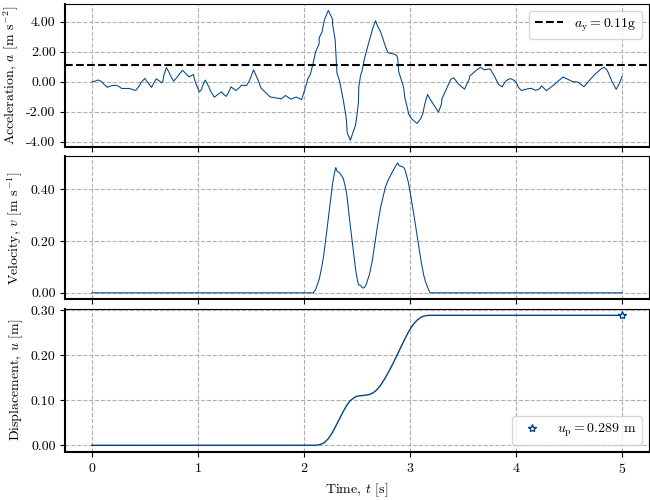

In [7]:
permanent_disp = direct_newmark(time, accel, ky, g)
fig = plot_newmark_integration(permanent_disp)
fig.canvas.header_visible = False 
fig.canvas.toolbar_position = 'bottom' 
plt.show()

## Comparing three signals with $a_\mathrm{max} = 5.5 \pm 0.1$ $\mathrm{m/s}^2$ 

In [8]:
url = "https://raw.githubusercontent.com/eamontoyaa/data4testing/main/pynewmarkdisp/"

# Loading earthquake data
g = 9.81  #  → It means, accel units are given in [m/s²]
record_1 = np.loadtxt(f"{url}earthquake_record_FLC049_amax5.5.txt")
record_1_time, record_1_accel = record_1[:, 0], record_1[:, 1]
record_2 = np.loadtxt(f"{url}earthquake_record_FLC050_amax5.5.txt")
record_2_time, record_2_accel = record_2[:, 0], record_2[:, 1]
record_3 = np.loadtxt(f"{url}earthquake_record_FLC057_amax5.5.txt")
record_3_time, record_3_accel = record_3[:, 0], record_3[:, 1]

print(f"a_max record 1: {record_1_accel.max():.2f} m/s² | a_max record 2: {record_2_accel.max():.2f} m/s² | a_max record 3: {record_3_accel.max():.2f} m/s²")


a_max record 1: 5.41 m/s² | a_max record 2: 5.50 m/s² | a_max record 3: 5.56 m/s²


### Calculating and plotting the spatial distribution of $u_\mathrm{p}$

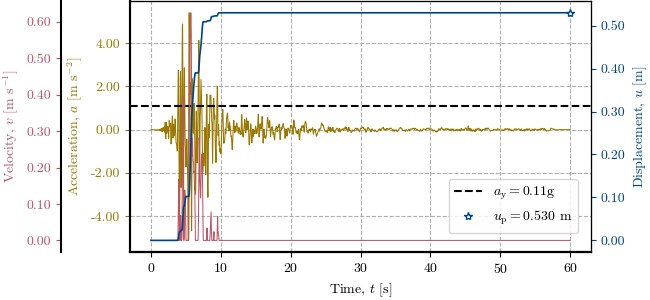

In [9]:
record_1_permanent_disp = direct_newmark(record_1_time, record_1_accel, ky, g)
fig = plot_newmark_integration(record_1_permanent_disp, compressed=True)
fig.canvas.header_visible = False 
fig.canvas.toolbar_position = 'bottom' 
plt.show()

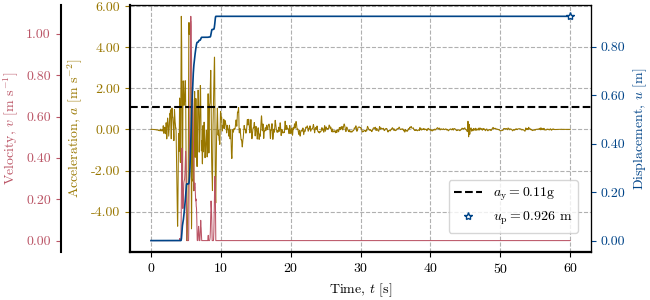

In [10]:
record_2_permanent_disp = direct_newmark(record_2_time, record_2_accel, ky, g)
fig = plot_newmark_integration(record_2_permanent_disp, compressed=True)
fig.canvas.header_visible = False 
fig.canvas.toolbar_position = 'bottom' 
plt.show()

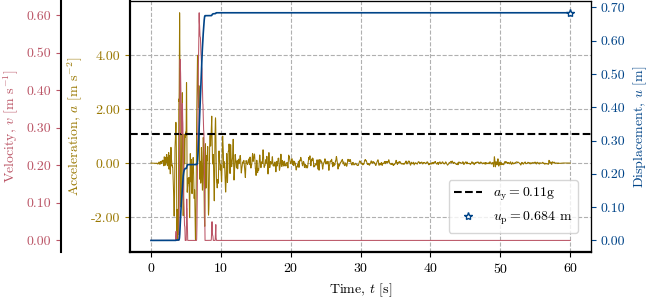

In [11]:
record_3_permanent_disp = direct_newmark(record_3_time, record_3_accel, ky, g)
fig = plot_newmark_integration(record_3_permanent_disp, compressed=True)
fig.canvas.header_visible = False 
fig.canvas.toolbar_position = 'bottom' 
plt.show()